In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [4]:
#in this workbook, we will be working with the Right Dfensive end position
re = df[df['Position'] == 'RE']

In [110]:
re.shape

(267, 171)

In [5]:
re.head()

,Overall Rating,Unnamed: 1,3Cone,Acceleration,Agility,Awareness,Ball Carrier Vision,Bench,Block Shedding,Broad Jump,...,Vertical/Bench,Vertical/Broad Jump,Vertical/3Cone,Vertical/Shuttle,Bench/Broad Jump,Bench/3Cone,Bench/Shuttle,Broad Jump/ 3Cone,Broad Jump/Shuttle,3Cone/Shuttle
160,83,160,7.30,82,78,91,32,24.0,70,115.0,...,1.333333,0.278261,4.383562,7.223476,0.208696,3.287671,5.417607,15.753425,25.959368,1.647856
161,76,161,7.30,89,74,75,29,18.0,68,115.0,...,1.777778,0.278261,4.383562,7.223476,0.156522,2.465753,4.063205,15.753425,25.959368,1.647856
162,75,162,7.57,81,74,73,20,24.0,71,117.0,...,1.416667,0.290598,4.491413,7.505519,0.205128,3.170410,5.298013,15.455746,25.827815,1.671082
163,62,163,7.30,84,71,52,38,27.0,74,110.0,...,1.129630,0.277273,4.178082,6.884876,0.245455,3.698630,6.094808,15.068493,24.830700,1.647856
164,76,164,7.32,85,72,75,24,24.0,79,106.0,...,1.145833,0.259434,3.756831,6.152125,0.226415,3.278689,5.369128,14.480874,23.713647,1.637584


In [5]:
recols = list(re.columns.values)

In [6]:
print(recols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [8]:
#Removing non-numeric values
re1 = re[['Overall Rating', '3Cone', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Bench', 'Block Shedding',
          'Broad Jump', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power',
          'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Pass Block', 'Play Action', 'Play Recognition',
          'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Shuttle', 'Speed', 'Spin Move', 'Stamina',
          'Stiff Arm', 'Strength', 'Tackle', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short',
          'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Vertical', 'Zone Coverage']]

In [9]:
re1.corr()

,Overall Rating,3Cone,Acceleration,Agility,Awareness,Ball Carrier Vision,Bench,Block Shedding,Broad Jump,Carrying,...,Tackle,Throw Accuracy Deep,Throw Accuracy Mid,Throw Accuracy Short,Throw Power,Throw on the Run,Toughness,Trucking,Vertical,Zone Coverage
Overall Rating,1.000000,-0.157052,0.178798,0.280111,0.863251,-0.126898,0.157002,0.335906,0.069879,0.010438,...,0.489911,-0.042725,-0.051285,-0.054875,0.045287,-0.077932,0.223069,-0.172952,0.124812,0.289555
3Cone,-0.157052,1.000000,-0.168240,-0.167874,-0.086337,-0.211052,0.117239,-0.163291,-0.316422,0.007792,...,0.012190,-0.144131,-0.136088,-0.130910,-0.092537,-0.093216,-0.172191,-0.087294,-0.221138,-0.150338
Acceleration,0.178798,-0.168240,1.000000,0.617951,-0.070443,0.547216,-0.059153,-0.242030,0.210440,0.129368,...,-0.250375,0.068845,0.070471,0.070498,0.141691,0.074418,-0.043672,0.359804,0.208535,0.487911
Agility,0.280111,-0.167874,0.617951,1.000000,-0.080937,0.539342,-0.095078,-0.188602,0.224773,0.240211,...,-0.063194,0.037198,0.044838,0.048786,0.104976,0.010469,0.000571,0.257259,0.205901,0.612179
Awareness,0.863251,-0.086337,-0.070443,-0.080937,1.000000,-0.325193,0.174292,0.228633,-0.044135,-0.051948,...,0.402521,-0.043737,-0.053645,-0.058240,-0.006402,-0.054694,0.196304,-0.261274,0.051841,0.114612
Ball Carrier Vision,-0.126898,-0.211052,0.547216,0.539342,-0.325193,1.000000,-0.124571,-0.264775,0.264745,0.355757,...,-0.293243,0.163926,0.158009,0.153019,0.300445,0.169508,-0.054619,0.630423,0.207955,0.433290
Bench,0.157002,0.117239,-0.059153,-0.095078,0.174292,-0.124571,1.000000,0.127376,-0.067359,0.045334,...,0.113197,0.308873,0.298589,0.291791,0.078403,0.149179,-0.001438,0.029006,0.101872,-0.021402
Block Shedding,0.335906,-0.163291,-0.242030,-0.188602,0.228633,-0.264775,0.127376,1.000000,0.003997,-0.184211,...,0.561290,0.009222,0.012096,0.014437,0.018757,-0.064547,0.179583,-0.130883,-0.011205,-0.250498
Broad Jump,0.069879,-0.316422,0.210440,0.224773,-0.044135,0.264745,-0.067359,0.003997,1.000000,0.136696,...,-0.063566,0.106012,0.101721,0.099016,0.093355,0.048943,0.039928,0.128764,0.699401,0.147743
Carrying,0.010438,0.007792,0.129368,0.240211,-0.051948,0.355757,0.045334,-0.184211,0.136696,1.000000,...,-0.092124,0.093369,0.096123,0.097660,0.278771,0.005020,-0.078593,0.290179,0.248523,0.235728


In [11]:
recorr = re1.corr()

In [12]:
##Now we are going to find the significant variables for the right end position
resigpos = recorr[recorr['Overall Rating'] >= 0.50]

In [13]:
resigneg = recorr[recorr['Overall Rating'] <= - 0.50]

In [14]:
print(resigpos['Overall Rating'])

Overall Rating      1.000000
Awareness           0.863251
Play Recognition    0.847928
Pursuit             0.584477
Name: Overall Rating, dtype: float64


In [15]:
#This position actually has a negative correlation.  The better a player is at pass blocking, the worse they are at the position
print(resigneg['Overall Rating'])

Series([], Name: Overall Rating, dtype: float64)


In [16]:
resig = re[['Awareness', 'Play Recognition', 'Pursuit']]

In [17]:
#Let's start doing some vif testing to eliminate any multicollinearity from the model.  We will also add a constant
resig = re[['Awareness', 'Play Recognition', 'Pursuit']]
X = add_constant(resig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#It looks like we will start by removing play recognition

const               238.934590
Awareness            16.641960
Play Recognition     17.409696
Pursuit               1.291354
dtype: float64

In [19]:
resig1 = re[['Awareness', 'Pursuit']]
X = add_constant(resig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our VIF scores are below 5, we can move on to statistical testing

const        228.826738
Awareness      1.216066
Pursuit        1.216066
dtype: float64

In [21]:
RE = sm.OLS(re['Overall Rating'], resig1).fit()
print(RE.summary())
#It looks like all of our variables are significant

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.001e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          9.40e-207
Time:                        23:25:18   Log-Likelihood:                -443.81
No. Observations:                 162   AIC:                             891.6
Df Residuals:                     160   BIC:                             897.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4869      0.025     19.382      0.0

In [22]:
def model():
    pv = 0.4869*re['Awareness'] + 0.4882*re['Pursuit']
    return pv

In [24]:
re['Predicted Value'] = model()
re['Residual'] = re['Predicted Value'] - re['Overall Rating']

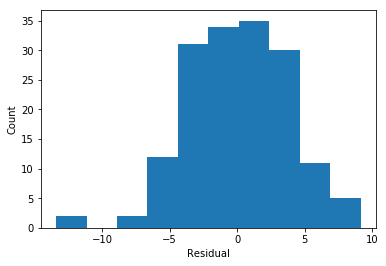

In [25]:
plt.hist(re['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

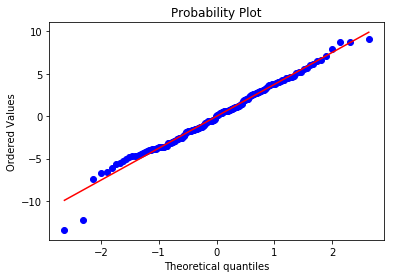

In [26]:
stats.probplot(re['Residual'], plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

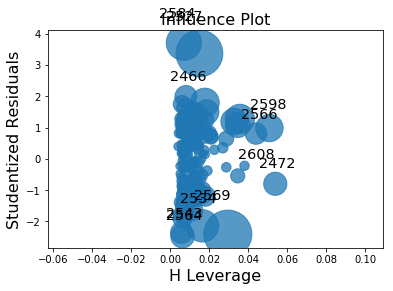

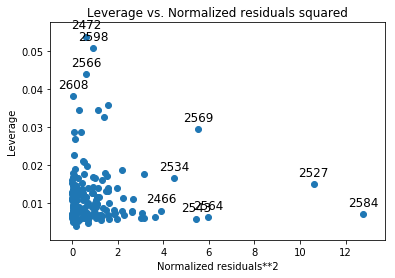

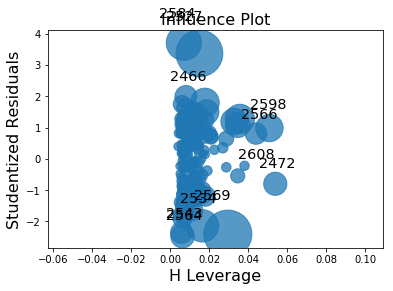

In [27]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(RE)
influence_plot(RE)
#There are some points with high residuals but they seem to be haivng a low amount of leverage

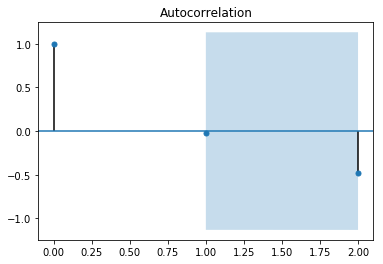

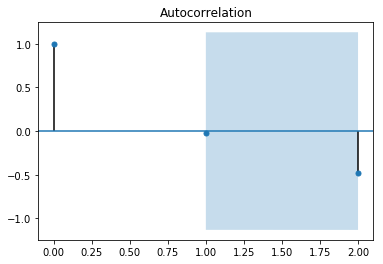

In [28]:
recorr1 = re[['Overall Rating', 'Awareness', 'Pursuit']].corr()
plot_acf(recorr1['Overall Rating'])
#there does not appear to be any autocorrelation looking at the plot below
#There is also a Durbin-Watson correlation of 2.011, which indicates no significant autocoreelation

In [29]:
#Finally, we check for homoskedasticity
het_breuschpagan(re['Residual'], resig1)
#Due to the low p-values, we can reject the null that there is homoskedasticity in the data

(45.034549411321926,
 1.9358864948542495e-11,
 30.80194993285044,
 4.823993265667228e-12)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(resig1, re['Overall Rating'], test_size = 0.3, random_state =42)

In [31]:
reg=LinearRegression()

In [33]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
cbcv = cross_val_score(reg, resig1, re['Overall Rating'], cv=5)

In [35]:
cbcv_mean = np.mean(cbcv)

In [36]:
print(cbcv, cbcv_mean)
#it looks like the model did a good job of explaining the variation in the data.  It explained 78.19% of the variation

[0.78644131 0.77921176 0.810234   0.77341982 0.76005284] 0.7818719455064251


In [38]:
redesc = re[['Overall Rating', 'Awareness', 'Pursuit']]
redesc1 = redesc.describe()
redesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\redesc1.csv')

In [58]:
RE = sm.OLS(re['Overall Rating'], resig23).fit()

In [59]:
print(RE.summary())
#Uh oh, it looks like some of the p-values are too high so we might need to remove some more variables from the model.
#Let's start by removing 4avg route running

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.954e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:22:51   Log-Likelihood:                -653.98
No. Observations:                 267   AIC:                             1328.
Df Residuals:                     257   BIC:                             1364.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [60]:
resig24= re[['Awareness', 'Block Shedding','Pursuit', 'Strength', 'Tackle', '2AVG Awareness', '3AVG Throw Power',
            '2AVG Throw Accuracy Mid','Pass Block']]

In [61]:
RE1 = sm.OLS(re['Overall Rating'], resig24).fit()
print(RE1.summary())
#That helped but we will remove 3avg throw power

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.179e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:22:56   Log-Likelihood:                -653.98
No. Observations:                 267   AIC:                             1326.
Df Residuals:                     258   BIC:                             1358.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [62]:
resig25= re[['Awareness', 'Block Shedding','Pursuit', 'Strength', 'Tackle', '2AVG Awareness',
            '2AVG Throw Accuracy Mid','Pass Block']]

In [63]:
RE2 = sm.OLS(re['Overall Rating'], resig25).fit()
print(RE2.summary())
#next we will remove strength

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.461e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:23:02   Log-Likelihood:                -654.00
No. Observations:                 267   AIC:                             1324.
Df Residuals:                     259   BIC:                             1353.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [64]:
resig26= re[['Awareness', 'Block Shedding','Pursuit','Tackle', '2AVG Awareness',
            '2AVG Throw Accuracy Mid','Pass Block']]

In [65]:
RE3 = sm.OLS(re['Overall Rating'], resig26).fit()
print(RE3.summary())
#Next we will remove block shedding

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.819e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:23:06   Log-Likelihood:                -654.21
No. Observations:                 267   AIC:                             1322.
Df Residuals:                     260   BIC:                             1348.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [66]:
resig27= re[['Awareness','Pursuit','Tackle', '2AVG Awareness',
            '2AVG Throw Accuracy Mid','Pass Block']]

In [67]:
RE4 = sm.OLS(re['Overall Rating'], resig27).fit()
print(RE3.summary())
#Next we will remove 2avg awareness

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.819e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:23:09   Log-Likelihood:                -654.21
No. Observations:                 267   AIC:                             1322.
Df Residuals:                     260   BIC:                             1348.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [68]:
resig28= re[['Awareness','Pursuit','Tackle',
            '2AVG Throw Accuracy Mid','Pass Block']]

In [69]:
RE5 = sm.OLS(re['Overall Rating'], resig28).fit()
print(RE5.summary())
#Next we will remove 2avg throw accuracy mid

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.946e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:23:12   Log-Likelihood:                -655.21
No. Observations:                 267   AIC:                             1320.
Df Residuals:                     262   BIC:                             1338.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [70]:
resig29= re[['Awareness','Pursuit','Tackle', 'Pass Block']]

In [71]:
RE6 = sm.OLS(re['Overall Rating'], resig29).fit()
print(RE6.summary())
#It looks like all of our dependent variables are significant 

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.930e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:23:15   Log-Likelihood:                -655.81
No. Observations:                 267   AIC:                             1320.
Df Residuals:                     263   BIC:                             1334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4713      0.019     25.384      0.0

In [72]:
def model():
    predicted_value = (0.4713 * re['Awareness']) + (0.3866 * re['Pursuit']) + (0.1502 * re['Tackle']) - (0.0631 * re['Pass Block'])
    return predicted_value

In [73]:
#Now lets do some training and testing of the model itself
X_train, X_test, y_train, y_test = train_test_split(resig29, re['Overall Rating'], test_size = 0.3, random_state=42)

In [74]:
reg = LinearRegression()

In [75]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
y_pred = reg.predict(X_test)

In [77]:
print(y_pred)

[84.13804836 84.13804836 86.35061873 80.91304861 66.07539351 57.5789473
 84.13804836 66.23491712 70.12082701 84.13804836 76.00463251 84.13804836
 76.67966787 84.13804836 64.43581329 84.13804836 75.32506625 71.49506272
 79.01924071 71.46584681 76.16967749 84.13804836 84.13804836 84.13804836
 69.7887316  84.13804836 72.50625393 84.13804836 84.13804836 60.83361927
 66.14989098 84.13804836 84.13804836 84.13804836 71.83673994 80.70593773
 84.13804836 71.02481245 62.29077361 84.13804836 84.13804836 70.32667516
 59.89985954 62.02869728 69.57058901 84.13804836 55.7719932  84.13804836
 84.13804836 67.20624607 84.13804836 67.33954969 64.07749789 72.62997573
 84.13804836 55.55183578 84.13804836 74.47339864 84.13804836 72.43544258
 84.13804836 71.8324813  84.13804836 84.13804836 70.56126876 68.32877954
 75.56545348 84.13804836 68.05665095 60.41786252 84.13804836 69.93098426
 74.48877409 84.13804836 74.44292001 78.03426949 71.95872855 84.13804836
 76.88677875 84.13804836 84.13804836]


In [78]:
y_pred.shape

(81,)

In [79]:
recv = cross_val_score(reg, resig29, re['Overall Rating'], cv = 5)

In [80]:
print(recv)

[0.8873111  0.         0.91431705 0.82073025 0.76038772]


In [81]:
re['Predicted Value'] = model()

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
re['Residuals'] = re['Predicted Value'] - re['Overall Rating']

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


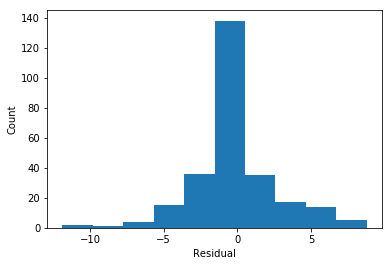

In [83]:
plt.hist(re['Residuals'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

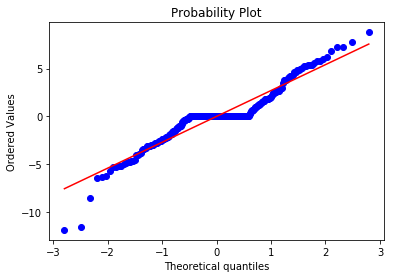

In [85]:
stats.probplot(re['Residuals'], plot=plt)
plt.show()
#It looks like there might be a few outliers at the bottom.  Let's take them out and then re run the model.

In [86]:
print(RE5.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.946e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:28:18   Log-Likelihood:                -655.21
No. Observations:                 267   AIC:                             1320.
Df Residuals:                     262   BIC:                             1338.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Awareness                 

In [89]:
reclean = re[re['Residuals'] > -10]
redesc = reclean[['Overall Rating', 'Awareness', 'Pursuit', 'Tackle', 'Pass Block']]
recleansig = reclean[['Awareness','Pursuit','Tackle', 'Pass Block']]
RE6 = sm.OLS(reclean['Overall Rating'], recleansig).fit()
print(RE6.summary())
#It looks like removing the two outliers reduced the AIC score by roughly 50 points
#It also moved the Durbin Watson score closer to 2 and therefore reduced some of the autocorrelation
#From an absolute value, it reduced the skew but it went from a positive to a negative
#All of our values are still significant though so let's move forward with testing

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.608e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:30:35   Log-Likelihood:                -632.62
No. Observations:                 265   AIC:                             1273.
Df Residuals:                     261   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4737      0.017     27.171      0.0

In [90]:
def model():
    pv=0.4737*reclean['Awareness']+ 0.4280*reclean['Pursuit']+0.1094*reclean['Tackle']- 0.0716*reclean['Pass Block']
    return pv

In [94]:
reclean['Predicted Values'] = model()
reclean['Residuals'] = reclean['Predicted Values'] - reclean['Overall Rating']

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


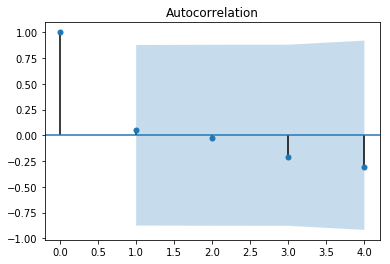

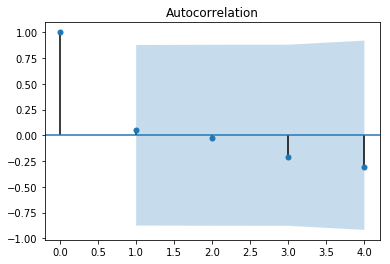

In [95]:
recleancorr = reclean[['Overall Rating', 'Awareness', 'Pursuit', 'Tackle', 'Pass Block']].corr()
plot_acf(recleancorr['Overall Rating'])
#There does not appear to be a significant amount of autocorrelation

In [102]:
reclean1 = reclean[['Awareness', 'Pursuit', 'Tackle', 'Pass Block']]

In [104]:
RE6 = sm.OLS(re['Overall Rating'], resig29).fit()
print(RE6.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.930e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:42:54   Log-Likelihood:                -655.81
No. Observations:                 267   AIC:                             1320.
Df Residuals:                     263   BIC:                             1334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4713      0.019     25.384      0.0

In [105]:
RE7 = sm.OLS(reclean['Overall Rating'], reclean1).fit()

In [106]:
print(RE7.summary())
#It looks like the AIC went down.  Let's check the qq plot as well and test it

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.608e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:43:00   Log-Likelihood:                -632.62
No. Observations:                 265   AIC:                             1273.
Df Residuals:                     261   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4737      0.017     27.171      0.0

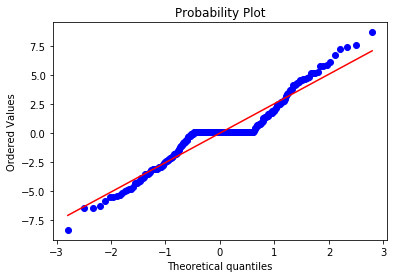

In [107]:
stats.probplot(reclean['Residuals'], plot=plt)
plt.show()
#It looks like there might still be one more outlier.  Let's remove that outlier and see what happens from there

In [108]:
def model1():
    predicted_value = (0.4737 * reclean1['Awareness']) + (0.4280 * reclean1['Pursuit']) + (0.1094 * reclean1['Tackle'])-(0.0716 * reclean1['Pass Block'])
    return predicted_value

In [109]:
reclean1['Predicted Values'] = model()

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
reclean1['Residuals'] = reclean1['Predicted Values'] - reclean['Overall Rating']

C:\Users\tilleymusprime\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


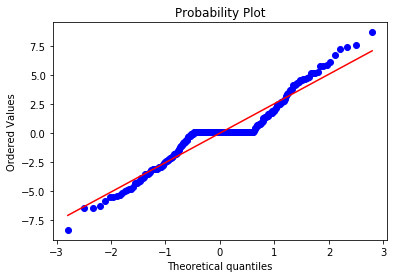

In [111]:
stats.probplot(reclean1['Residuals'], plot=plt)
plt.show()
#This time, we are going to remove the max and min residual

In [112]:
reclean1['Residuals'].max()

8.7102

In [113]:
reclean1['Residuals'].min()

-8.3686

In [114]:
reclean2 = re[re['Residuals'] > -8.5]

In [115]:
reclean3 = reclean2[reclean2['Residuals'] < 8.75]

In [116]:
reclean4 = reclean3[['Awareness', 'Pursuit', 'Tackle', 'Pass Block']]

In [117]:
RE8 = sm.OLS(reclean3['Overall Rating'], reclean4).fit()

In [118]:
print(RE7.summary())

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.608e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:43:18   Log-Likelihood:                -632.62
No. Observations:                 265   AIC:                             1273.
Df Residuals:                     261   BIC:                             1288.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4737      0.017     27.171      0.0

In [119]:
print(RE8.summary())
#Once agian the AIC score has gone down so the model appears to be stronger by removing two more outliers

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.005e+04
Date:                Wed, 18 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:43:20   Log-Likelihood:                -617.91
No. Observations:                 263   AIC:                             1244.
Df Residuals:                     259   BIC:                             1258.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Awareness      0.4742      0.017     28.246      0.0

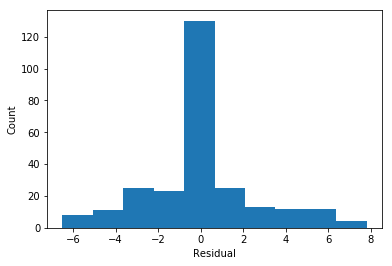

In [120]:
plt.hist(reclean3['Residuals'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

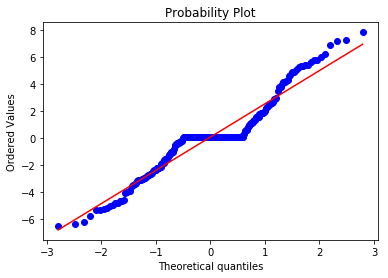

In [121]:
stats.probplot(reclean3['Residuals'], plot = plt)
plt.show()
#It looks like a better fit and the residuals do appear to be evenly disributed

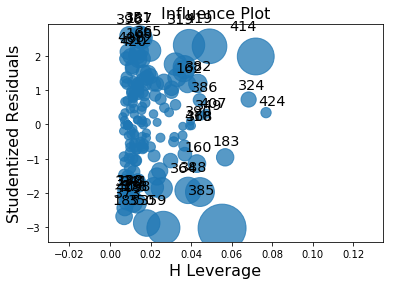

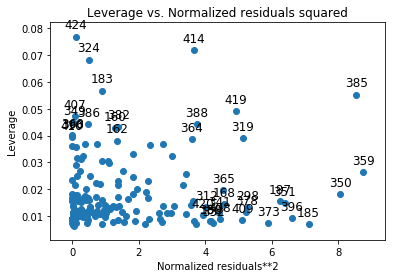

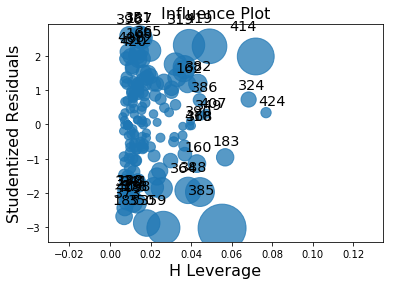

In [122]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(RE8)
influence_plot(RE8)
#It looks like we have some leverage points in the data. They do not appear high enough that we need to remove them though

In [124]:
#Finally, we move on to the Breusch Pagan test to check for heteroskedasticity
het_breuschpagan(reclean3['Residuals'], reclean4)
#Based on the extremely low p-values, we can reject the null that there is heteroskedasticity

(120.14918095608115,
 7.166512585017826e-26,
 54.46002703361771,
 2.8337341925726123e-33)

In [127]:
#Finally, let's test our new model and see how it did
#Now that we have determined that we can use linear regression, let's run some tests and see how accuract our linear 
#regression model is
X_train, X_test, y_train, y_test = train_test_split(reclean4, reclean3['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
recv = cross_val_score(reg, reclean4, reclean3['Overall Rating'], cv=5)
recv_mean = np.mean(recv)
print(recv, recv_mean)
#It looks like on average this model explained 70% in the variation in the data
#It looks like the original was slightly less accuracte

[0.9133575  0.         0.91007755 0.84411317 0.82162363] 0.6978343689921891


In [128]:
X_train, X_test, y_train, y_test = train_test_split(recleansig, reclean['Overall Rating'], test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)
recv = cross_val_score(reg, recleansig, reclean['Overall Rating'], cv=5)
recv_mean = np.mean(recv)
print(recv, recv_mean)
#In both models, it looks like the progam really struggled with the 2nd test

[0.89140437 0.         0.92013804 0.83361971 0.80182673] 0.6893977694695351


In [130]:
redesc=reclean[['Overall Rating', 'Awareness', 'Pursuit', 'Tackle', 'Pass Block']]
redesc1 = redesc.describe()
redesc1.to_csv('C:\\Users\\tilleymusprime\\Desktop\\redesc1.csv')